<a href="https://colab.research.google.com/github/kmrakovcic/FoP_ML_workshop23/blob/master/02_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fitting

Curve fitting is a type of optimization that finds an optimal set of parameters for a defined function that best fits a given set of observations.

Unlike supervised learning, curve fitting requires that you define the function that maps examples of inputs to outputs.

The mapping function, also called the basis function can have any form you like, including a straight line (linear regression), a curved line (polynomial regression), and much more. This provides the flexibility and control to define the form of the curve, where an optimization process is used to find the specific optimal parameters of the function.

#Example 1
If I draw values from a Gaussian $N(\mu, \sigma)$, e.g. measuring quantity $\mu$
with uncertainty $\sigma$ (somewhat erroneously a.k.a. “error bar”), then the probability that the measured value will be between $x$ and $x+dx$ is:

$$ p(x) = N(\mu,\sigma) * dx $$
where:

$$ N(\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$


For a sample of $N$ data points, $\{x_i\}$, where the uncertainty for each measurement is Gaussian with
a known $\sigma$, the likelihood of all N measurements is

$$L \equiv p(\{x_i\}|\mu,\sigma) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right).$$

**An important assumption** that we made here is that random noise for different
data points is independent (if it's not, we need to use methods such as Gaussian
process modelling). This assumption allowed us to simply multiply the likelihoods
for individual data points to obtain the likelihood of the whole dataset.

### Maximum Likelihood Estimation (MLE) is one of the most important methods in statistics

**MLE:** Assume that the likelihood function is given by
$$L(\mu,\sigma) \equiv p(\{x_i\}|\mu,\sigma) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right).$$

We obtain
$$lnL(\mu,\sigma) \equiv ln[p(\{x_i\}|\mu,\sigma)] = const. - \frac{1}{2}\sum_{i=1}^N \frac{(x_i-\mu)^2}{\sigma^2}.$$

Text(0.5, 0, 'x')

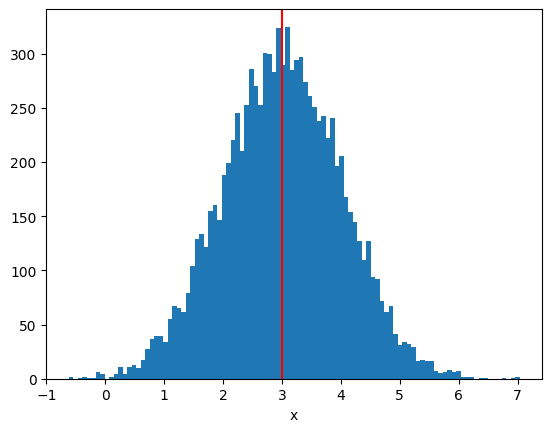

In [12]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def generate_data_gaussian(mu, sig):
    return np.random.normal(mu, sig, 10000)

def generate_gaussian_noise(x, error):
    return x + np.random.normal(0, error, x.shape)

data = generate_data_gaussian (3, 1)
data = generate_gaussian_noise(data, 0.1)
fig, ax = plt.subplots()
ax.hist (data, bins=100)
ax.axvline (3, 0, 1, color="red")
ax.set_xlabel("x")

#### Maximum Likelihood Estimation (MLE) applied to a Heteroscedastic Gaussian

For example, assume $N$ measurements, $\{x_i\}$, where the uncertainty for each measurement is Gaussian with
a known $\sigma_i$. The likelihood of one measurement is

$$p(x_i|\mu,\sigma_i) = \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$


and therefore the likelihood of all N measurements is

$$L \equiv p(\{x_i\}|\mu,\sigma_i) = \prod_{i=1}^N \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$

The more convenient log-likelihood is
$$\ln L = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}.$$

Taking the derivative:
$$\frac{d\;{\rm lnL}(\mu)}{d\mu}\Biggr\rvert_{\mu_0} = \sum_{i=1}^N \frac{(x_i - \mu_o)}{\sigma_i^2} = 0,$$
then simplifying:

$$\sum_{i=1}^N \frac{x_i}{\sigma_i^2} = \sum_{i=1}^N \frac{\mu_o}{\sigma_i^2},$$

yields an MLE solution of
$$\mu_0 = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$

with uncertainty (from the second derivative)
$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}.$$


In the case of homoscedastic uncertainties, we get the familiar expression
$$\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}.$$


** Know your likelihood! **

The result for $\sigma_{\mu}$ has been derived by expanding $\ln L$ in a Taylor
series and retaining terms up to the second order (essentially, the surface of $\ln L$
is approximated by a parabola, or an ellipsoidal surface in multidimensional cases,
around its maximum). If this expansion is exact (as is the case for a Gaussian error
distribution), then we've completely captured the error information (see illustration
below).

In general, this is not the case and the likelihood surface can significantly deviate
from a smooth elliptical surface. Furthermore, it often happens in practice that the
likelihood surface is multimodal. It is always a good idea to visualize the likelihood
surface when in doubt.

In [13]:
def neg_log_likelihood(x):
    def function(parm):
        mu = parm[0]
        sig = 0.1
        return np.sum((x-mu)**2/(2*sig**2))
    return function

def maximum_likelihood_estimate(x):
    return scipy.optimize.minimize(neg_log_likelihood(x), [2.5], bounds=[(0, 5)])

MLE_object = maximum_likelihood_estimate(data)
a = MLE_object.x[0]
print ("Value of a:", a)

Value of a: 3.0073815519872205


#Example 2
Given the data and the theoretical function, calculate the parameters of that function.

First, we have to simulate some data. Imagine we are doing some experiment where $x$ is an independent variable, and we know from theory that the dependent variable that we measure must satisfy the law:
$$ y = a+b \cdot 10^{cx} $$

In reality let's say that the unknown parameters are:
* a=0.84
* b=0.34
* c=0.45

The first step is to simulate the measurements. Instead of generating perfect data, to faithfully recreate the measuring process, a random Gaussian noise with $\sigma = 0.1$ is added.

Text(0, 0.5, 'y')

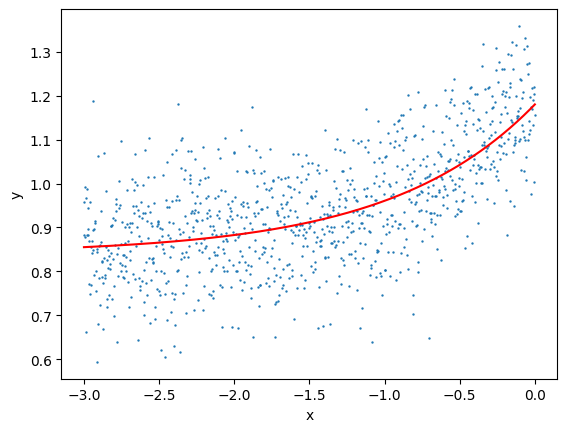

In [14]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def data_generation (x):
    y = 0.84 + 0.34 * np.power(10, 0.45*x)
    return y+np.random.normal(0, 0.1, size=y.shape)

data_x = np.linspace (-3, 0,1000)
data_y = data_generation (data_x)
fig, ax = plt.subplots()
ax.scatter (data_x, data_y, s=0.5)
ax.plot (data_x, 0.84 + 0.34 * np.power(10, 0.45*data_x), color="red")
ax.set_xlabel("x")
ax.set_ylabel("y")

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data. This is achieved by maximizing a likelihood function so that, under the assumed statistical model, the observed data is most probable.

Let's say that we know that some data were drawn from a Gaussian distribution, but we don't know the $\theta = (\mu,\sigma)$ values of that distribution (i.e., the parameters).

Then Maximum Likelihood Estimation method tells us to think of the likelihood as a ***function of the unknown model parameters***, and ***find those that maximize the value of $L$***. Those will be our Maximum Likelihood Estimators for the true values of the model.

For a sample of $N$ data points, $\{x_i\}$, where the uncertainty for each measurement is Gaussian with
a known $\sigma$, the likelihood of all N measurements is

$$L \equiv p(\{x_i\}|\mu,\sigma) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right).$$

Keep in mind that $\mu$ here is a function we are trying to fit, $\mu = \mu (a,b,c)$. If we calculate the logarithm of likelihood we get:
$$ \ln{L} = \sum_{i=1}^N \frac{-(x_i-\mu)^2}{2\sigma^2} \ln{\left(\frac{1}{\sigma\sqrt{2\pi}} \right)} $$
Under the assumption that all the measurements are done with the same uncertainty:
$$ \ln{L} = \left[ \frac{1}{2\sigma^2} \ln{\left(\frac{1}{\sigma\sqrt{2\pi}} \right)}\right]^N \sum_{i=1}^N -(x_i-\mu)^2$$

If we maximize that function we are maximizing:
$$ \ln{L} = - \sum_{i=1}^N (x_i-\mu)^2$$

Additionally for computational reasons, instead of maximizing, it is always better to minimize negative log-likelihood:
$$ -\ln{L} = \sum_{i=1}^N (x_i-\mu)^2$$

In machine learning, this function is usually called **Mean square error** (MSE)

In [15]:
def teoretical_function(x, a, b, c):
    return a + b * np.power(10, c*x)

def neg_log_likelihood(x, y):
    def function(parm):
        a = parm[0]
        b = parm[1]
        c = parm[2]
        mu = a + b * np.power(10, c*x)
        return np.sum((y-mu)**2)
    return function

def maximum_likelihood_estimate(x, y):
    return scipy.optimize.minimize(neg_log_likelihood(x, y), [0.5, 0.5, 0.5], bounds=[(0, 1), (0, 1), (0, 1)])

MLE_object = maximum_likelihood_estimate(data_x, data_y)
a, b, c = MLE_object.x
print ("Value of a:", a)
print ("Value of b:", b)
print ("Value of c:", c)

Value of a: 0.851673163367728
Value of b: 0.35358723179686624
Value of c: 0.5292080628398598


How to get uncertainty estimates? The usual way is to use the inverse hessian object, which on its diagonal has $\sigma$ values for all the parameters. Be aware this method is easy although it may not always work!

In [16]:
inv_hess = MLE_object.hess_inv.todense()
print (inv_hess)
print ("Value of a:", a, "+-", inv_hess[0,0])
print ("Value of b:", b, "+-", inv_hess[1,1])
print ("Value of c:", c, "+-", inv_hess[2,2])

[[ 0.02227878 -0.0454157   0.0722869 ]
 [-0.0454157   0.11324645 -0.12388357]
 [ 0.0722869  -0.12388357  0.27747922]]
Value of a: 0.851673163367728 +- 0.02227877629940511
Value of b: 0.35358723179686624 +- 0.11324645208914265
Value of c: 0.5292080628398598 +- 0.2774792248830499


To plot the best fit and the data:

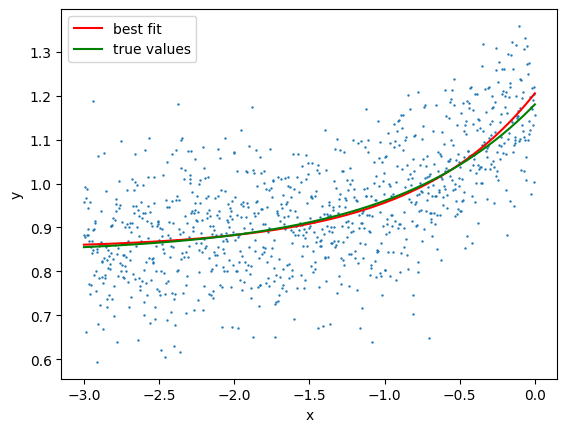

In [17]:
fig, ax = plt.subplots()
ax.scatter (data_x, data_y, s=0.5)
ax.plot (data_x, teoretical_function(data_x, a, b, c), color="red", label="best fit")
ax.plot (data_x, 0.84 + 0.34 * np.power(10, 0.45*data_x), color="green", label="true values")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.legend()

## Solution 2
There is another way to solve this problem. We can use the curve_fit function from the SciPy library.

In [18]:
parameters, error = scipy.optimize.curve_fit(teoretical_function, data_x, data_y)
print ("Value of a:", parameters[0], "+-", error[0,0])
print ("Value of b:", parameters[1], "+-", error[1,1])
print ("Value of c:", parameters[2], "+-", error[2,2])

Value of a: 0.8516730562309148 +- 8.198724554376527e-05
Value of b: 0.35358737152013303 +- 0.00016136610256547315
Value of c: 0.5292074290180646 +- 0.002672941692871389


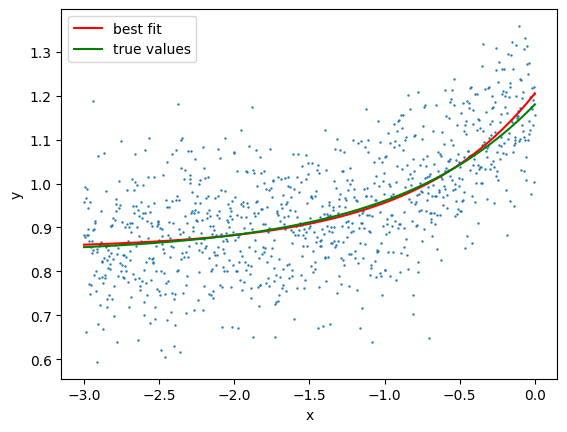

In [19]:
fig, ax = plt.subplots()
ax.scatter (data_x, data_y, s=0.5)
ax.plot (data_x, teoretical_function(data_x, parameters[0], parameters[1], parameters[2]), color="red", label="best fit")
ax.plot (data_x, 0.84 + 0.34 * np.power(10, 0.45*data_x), color="green", label="true values")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.legend()

#Excercise 1
**Calculate the mean lifetime of the cosmic muons using the data from the [simple setup for cosmic muon lifetime measurements](https://arxiv.org/abs/1801.07219).**

Decays of unstable nuclei and particles, including muons, are characterized by the decay probability in a unit of time, $\lambda$. The mean lifetime of the particle, $\tau$ , is defined as $\tau = \frac{1}{\lambda}$.
Decays follow the exponential radioactive decay law:
$$N(t) = N_0 e^{-\frac{t}{\tau}}$$
where $N_0$ is the number of unstable particles at the beginning, $t = 0$, and $N(t)$ is the number of particles that survive until time $t$.

In our case of lifetime measurement of cosmic muons, we cannot enclose cosmic
muons in a box and prepare a sample of a certain initial number of muons. Instead,
we register muons that come randomly into our scintillator. Most of the muons pass through the scintillator, but some of them stop and decay in it. Since $e^{-\frac{t}{\tau}}$ in the case of muons changes significantly over time, we will use a quantity that corresponds to the activity for the determination of the muon lifetime. In our case, the entrance of a muon into the scintillator represents the time t = 0. It is a consequence of the fact that the exponential radioactive decay law, which governs the decay of muons, is independent of the measurement starting time. Registering the time differences between the entrance of muons and their decay, which means the appearance of the signals from the corresponding electrons (positrons) in the scintillator, we can determine the distribution of muons decaying at time t, $I(t)$. This corresponds to the activity, $A(t)$, in the case of
decay of radioactive nuclei, and $I(t)$ follows the same exponential time dependence:
$$I(t) = I_0 e^{-\frac{t}{\tau}}$$
where $\tau$ is the muon lifetime and $I_0$ is the decay rate at $t = 0$.

There is also a constant flux of the particles in the detector that are not decaying. After accounting for the constant noise and calculating the normalization factor, exponential time dependence is:
$$I(t) = w \frac{1}{\tau \left( e^{-\frac{b_l}{\tau}}-e^{-\frac{b_h}{\tau}} \right)} e^{-\frac{t}{\tau}} + (1 - w) \frac{1}{b_h-b_l}$$
where $\tau$ is the mean lifetime of the muon, $b_l$ is the lower cutoff in the data, $b_h$ is the higher cuttof in the dataset, and $w$ is the ratio between signal and noise.

Download the [measurements file](https://github.com/kmrakovcic/FoP_ML_workshop23/blob/master/Muon_decay_data_partial.csv) and upload it to the colab. The file contains time differences in $\mu s$ between two signals in the scintillator caused by the cosmic rays. Using the maximum likelihood method calculate the measured muon lifetime.

Use $b_l = 0.75\mu s$ and $b_h = 9\mu s$!

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.8M  100 23.8M    0     0  91.4M      0 --:--:-- --:--:-- --:--:-- 91.4M


Text(0.5, 0, '$\\Delta t$')

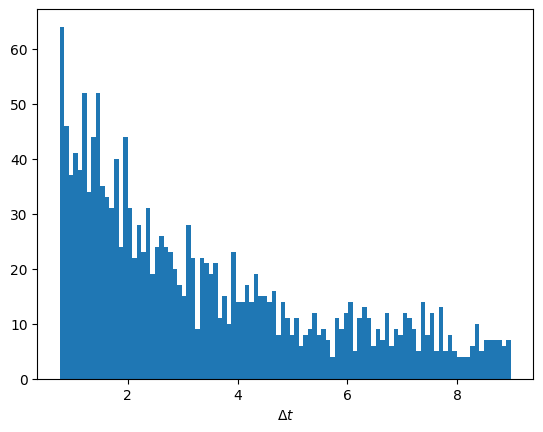

In [20]:
#To download the file with the mesurements
!curl -o "/content/Muon_decay_data.csv" "https://raw.githubusercontent.com/kmrakovcic/FoP_ML_workshop23/master/Muon_decay_data_partial.csv"

#To import data in NumPy
import pandas as pd
import numpy as np
data = np.array(pd.read_csv('/content/Muon_decay_data.csv'))
lower_cutoff=0.75
higher_cutoff=9
data = data[np.logical_and(data < higher_cutoff, data > lower_cutoff)]
fig, ax = plt.subplots()
histogram = ax.hist(data, bins=100)
ax.set_xlabel(r"$\Delta t$")

In [21]:
#@title My solution
# Write code here

w =  0.6470121129962481 +- 0.024000000000000004
tau =  2.0264898035373053 +- 0.10740000000000002


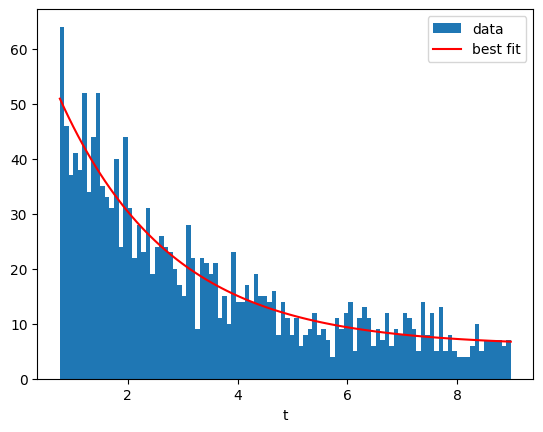

In [22]:
#@title Solution:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt


def neg_log_likelihood(x, lower_cutoff=0.75, higher_cutoff=9):
    """
    Function to calculate the negative log likelihood of the data given the parameters w and tau.
    :param x:
    :param lower_cutoff:
    :param higher_cutoff:
    :return:
    """
    def function(parm):
        """
        Function to calculate the negative log likelihood of the data given the parameters w and tau.
        :param parm:
        :return:
        """
        w = parm[0]
        tau = parm[1]
        y = w * 1/tau * 1/(np.exp(-lower_cutoff/tau)-np.exp(-higher_cutoff/tau)) * np.exp(-x/tau) + (1-w) * 1/(higher_cutoff-lower_cutoff)
        if np.any(y <= 0):
            return 1e10
        else:
            return -np.sum(np.log(y))
    return function


def exp_function(x, w, tau, lower_cutoff, higher_cutoff):
    """
    Function to calculate the data distribution model given the parameters w and tau.
    :param x:
    :param w:
    :param tau:
    :param lower_cutoff:
    :param higher_cutoff:
    :return:
    """
    y = w * 1/tau * 1/(np.exp(-lower_cutoff/tau)-np.exp(-higher_cutoff/tau)) * np.exp(-x/tau) + (1-w) * 1/(higher_cutoff-lower_cutoff)
    return y


def estimate_standard_deviation(data, params, lower_cutoff=0.75, higher_cutoff=9):
    """
    Estimate the standard deviation of the parameters using the fact that the likelihood function is a parabola
    around the maximum likelihood estimate. The standard deviation is the distance from the maximum likelihood
    estimate to the point where the likelihood function is 0.5 below the maximum likelihood estimate.
    :param data:
    :param params:
    :param lower_cutoff:
    :param higher_cutoff:
    :return:
    """
    likelihood = neg_log_likelihood(data, lower_cutoff, higher_cutoff)
    init_like = likelihood(params)
    p_err = np.zeros(len(params))
    for i,parameter in enumerate(params):
        for k in range(-1, 5):
            continue_l = True
            while continue_l:
                new_params = np.zeros(len(params))
                new_params[i] = p_err[i] + 10 ** (-k)
                new_params = new_params + params
                p_like = likelihood(new_params)
                if (p_like - init_like) >= 0.5 or np.isnan(p_like - init_like) or p_err[i] > 10:
                    continue_l = False
                else:
                    p_err[i] += 10 ** (-k)
    return p_err


def maximum_likelihood_estimate(data, lower_cutoff, higher_cutoff):
    """
    Function to calculate the maximum likelihood estimate of the parameters w and tau.
    :param data:
    :param lower_cutoff:
    :param higher_cutoff:
    :return:
    """
    data = data[np.logical_and(data < higher_cutoff, data > lower_cutoff)]
    popt = scipy.optimize.minimize(neg_log_likelihood(data, lower_cutoff, higher_cutoff), [0.75, 2], bounds=[(0, 1), (1, 3)])
    values = popt.x
    errors = estimate_standard_deviation(data, values, lower_cutoff, higher_cutoff)
    return values, errors


def fit_and_calculate_histogram(data, n_bins, lower_cutoff=0.75, higher_cutoff=9):
    """
    Function to calculate the histogram of the data and fit the data distribution model to the histogram.
    :param data:
    :param n_bins:
    :param lower_cutoff:
    :param higher_cutoff:
    :return:
    """
    [w, tau], [w_err, tau_err] = maximum_likelihood_estimate(data, lower_cutoff, higher_cutoff)
    return w, tau, w_err, tau_err


[w, tau], [w_err, tau_err] = maximum_likelihood_estimate(data, lower_cutoff=0.75, higher_cutoff=9)
fig, ax = plt.subplots()
histogram = ax.hist(data, bins=100, label="data")
bins = histogram[1]
fit = ax.plot (bins, exp_function(bins, w, tau, lower_cutoff=0.75, higher_cutoff=9)*(bins[1] - bins[0])*data.shape, color="red", label="best fit")
ax.set_xlabel("t")
plt.legend()
print ("w = ", w, "+-", w_err)
print ("tau = ", tau, "+-", tau_err)